In this notebook, we are going to learn more about **Clustering Algorithms** and mainly **K-Means Algorithm**. We will be learning about:
- Training K-Means Algorithm
- Evaluating the quality of the clusters generated
- Introducing the **Elbow Method** and **Silhouette Method** for selecting the best number of clusters

# K-means Clustering
For this task, we will be starting with a dummy dataset for easier visualization and manipulation. <br>
Let's start by importing the needed libraries:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

In the first example, we will generating a dummy dataset of 2000 instances that belong nicely to K clusters. 

In [ ]:
n_samples = 2000
random_state = 48
X, y = make_blobs(n_samples=n_samples, random_state=random_state)
print("number of features:",X.shape[1])
print("number of instances:",X.shape[0])

number of features: 2
number of instances: 2000


Let's go ahead and visualize the data:

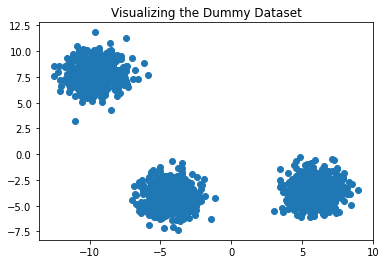

In [ ]:
plt.scatter(X[:,0],X[:,1])
plt.title("Visualizing the Dummy Dataset")
plt.show()

It is very clear that the data can be grouped into 3 clusters in this case. <br> Unfortunately not all the datasets can be easily visualized in 2 dimensions. Later on today we will be introducing an alternative way to tackle datasets with more than 2 features.
<br>
Next, let's try to use K-Means to detect these clusters: 

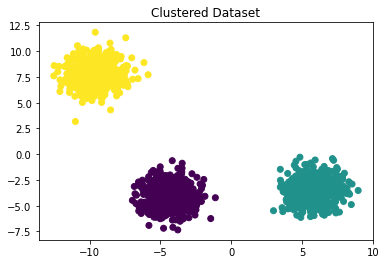

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=random_state)
y_pred=kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Clustered Dataset")
plt.show()

Neat! It seems that K-means was easily able to find the 3 clusters! Let's evaluate the performance of K-means:

In [ ]:
print("within-cluster sum-of-squares:",kmeans.inertia_)

within-cluster sum-of-squares: 4065.59356531019


As you might have noticed, inertia is not a very meaningful metric in our case. It is does not tell us how good the clusters are. However, it is really helpful when we need to search for **the optimal number of the clusters** as we will see soon.<br>
Next, let's try with **silhouette score**, which measures how similar a point is to its own cluster compared to other clusters.

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(X, y_pred, metric = 'euclidean')

0.8380811806366733

That is really good! Knowing that the maximum score for silhouette is 1, this shows that elements inside the clusters are similar to each other while being dissimilar to points in other clusters.

Next, let's investigate a real dataset and try to get some insights about the structure of the data. We will be using the Iris dataset which is usally a classification dataset for flower types based on their sepal and petal measures.

In [ ]:
from sklearn import datasets
iris=datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
import pandas as pd
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df["species"]=iris.target
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
print("Target classes:",np.unique(iris.target))

Target classes: [0 1 2]


As you can see now, we have 4 features which will make visualizing the data a bit hard. There are many approaches we can use like **dimensionality reduction** algorithms, **Andrew plots**... <br>
However, in this case we will use a different approach to tackle this clustering problem. We will be using the **Elbow Method**:


In [ ]:
ine = []
kmax = 10

for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(iris.data)
  ine.append(kmeans.inertia_)

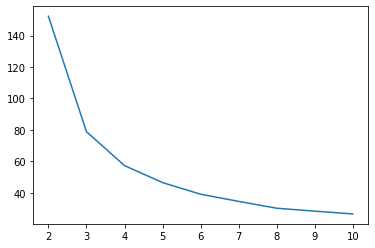

In [ ]:
plt.plot(np.arange(2,11),ine)

It seems that using the Elbow method, the best K value is either 3 or 4, which is close to the number of target classes already defined. <br>
Next, let's try to use the **Silhouette Method**: 

In [ ]:
sil = []
kmax = 10

for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(iris.data)
  labels = kmeans.labels_
  sil.append(silhouette_score(iris.data, labels, metric = 'euclidean'))

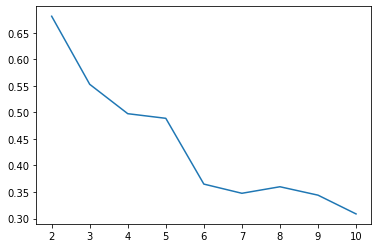

In [ ]:
plt.plot(np.arange(2,11),sil)

That is very intruiguing! We already know that there are three classes in this dataset, but why silhouette score is giving the best score for the case of two clusters? <br>
To understand what is happening here, we need to go back and investigate the data structure:

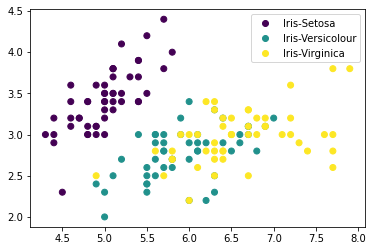

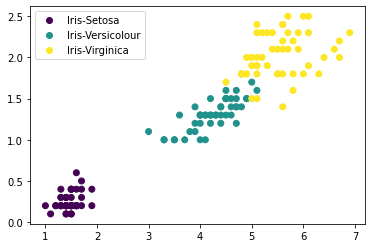

In [ ]:
scatter=plt.scatter(iris_df["sepal length (cm)"],iris_df["sepal width (cm)"],c=iris_df["species"],)
plt.legend(handles=scatter.legend_elements()[0],labels=("Iris-Setosa","Iris-Versicolour","Iris-Virginica"))
plt.show()

scatter=plt.scatter(iris_df["petal length (cm)"],iris_df["petal width (cm)"],c=iris_df["species"],)
plt.legend(handles=scatter.legend_elements()[0],labels=("Iris-Setosa","Iris-Versicolour","Iris-Virginica"))
plt.show()

We notice two important points:
- Visualizing the data shows that the dataset (at least in its parts) does not have condensed blobs or clusters.
- The dataset have 4 features. Knowing that the Euclidian distance is used by K-Means, it will start to lose its meaning as we increase the dimensions. This can prevent the clustering process from converging to the best solution.

## Further Steps
Now that you know how to use K-Means, you can try the following:
- Use different approaches of clustering, including Hierarchical Clustering
- Evaluate the clusters quality with other metrics
- Experiment with different datasets